# Reproduce C. Stewart, et. al , ACS Catal. 2018, 8, 8255−8262

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

Authors (16): C. Stewart, E. K. Gibson, K. Morgan, G. Cibin, A. J. Dent, C. Hardacre, E. V. Kondratenko, V. A. Kondratenko, C. McManus, S. M. Rogers, C. E. Stere, S. Chansai, Y. -C. Wang, S. J. Haigh, P. P. Wells, A. Goguet (2018). **Unraveling the H2Promotional Effect on Palladium-Catalyzed CO Oxidation Using a Combination of Temporally and Spatially Resolved Investigations** DOI: [10.1021/acscatal.8b01509](http://dx.doi.org/10.1021/acscatal.8b01509).

- **Corresponding authors**:  Emma K. Gibson, Kevin Morgan
- **E-mails**: 

The data used for reproducing the results was published in the University of Glasgow Enlighten Research Data [doi:10.5525/gla.researchdata.654](https://researchdata.gla.ac.uk/654/)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in [Figure 2](https://pubs.acs.org/cms/10.1021/acscatal.8b01509/asset/images/medium/cs-2018-01509s_0002.gif): with the caption and the metadata indicate which data can be used for reproducing the results presented.

**Figure Caption**
> **Fig. 2** Magnitude component of the k3-weighted non-phase-corrected Fourier transform of the EXAFS data at the front, middle, and end of the catalyst bed of the (a) fresh catalyst, (b) the catalyst under CO oxidation, and (c) the catalyst under CO oxidation with H2. Features consistent with scattering from O, Pd (of Pd0), and Pd (of PdO) are highlighted in blue, green, and yellow boxes, respectively.

**Metadata** (Readme_1141.docx - Word file)
> The XAFS spectra underpinning the results shown in the manuscript are contained in three Athena files. Included in the 100C_helium file are spectra of a Pd foil reference and PdO reference material.
>- 100C_Helium
>- 280C_with_H2
>- 280C_without_H2


In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, LCF
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

import lib.manage_fit as fitmgr

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

#larch libraries for preprocessing
from larch.xafs import pre_edge
from larch.xafs import autobk
from larch.xafs import xftf

# custom plot functions for paper
import paper03_plots as c_plot


He_100c_data = "C:/harwell/PSDI_test/wf_data/pub_366/DS0229/100C_Helium.prj" # fresh catalyst (2a)
CO_280c_data = "C:/harwell/PSDI_test/wf_data/pub_366/DS0229/280C_without_H2.prj" # CO oxidation without H2 (2b)
H2_280c_data = "C:/harwell/PSDI_test/wf_data/pub_366/DS0229/280C_with_H2.prj" # CO oxidation with H2 (2c)

# read the input files 
data_prj = athenamgr.read_project(He_100c_data)

 do not know what to do with key 'LCF' at ''


In [2]:
#plot chi magnitude (FT)
        
def plot_chi_magnitude(athena_groups = {}, include_groups = {}, 
                       aspect = (6,8), xlim=[],ylim=[], 
                       shading = [], plt_lbls=[]):
    plt.figure(figsize=aspect)
    for g_indx, a_group in enumerate(include_groups):
        if athena_groups[a_group].filename in include_groups:
                plt.plot(athena_groups[a_group].r, 
                         athena_groups[a_group].chir_mag, 
                         label=athena_groups[a_group].filename,
                         color = include_groups[a_group][0],
                         linestyle = include_groups[a_group][1]
                        ) 

    frame1 = plt.gca()
    plt.xlabel("$R(\mathrm{\AA})$")
    plt.ylabel("$|\chi(R)|(\mathrm{\AA}^{-4})$")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    for a_shape in shading:
        plt.fill(a_shape[0],a_shape[1], color=a_shape[2],alpha=a_shape[3])
    for a_lbl in plt_lbls:
        plt.text(a_lbl[0],a_lbl[1], a_lbl[2])   
    return plt
    

### Reproduce figure 3a 


In [3]:
He_100c_mappings={"FRONT":  "Pd_bkg_100c_He_pos1_FRONT_merge",
                  "END":    "Pd_bkg_100c_He_pos11_END_merge",
                  "MIDDLE": "Pd_bkg_100c_He_pos5_MIDDLE_merge",}

He_100ca_groups = {}
for a_mapping in He_100c_mappings:
    He_100ca_groups[a_mapping] = athenamgr.get_group(data_prj, He_100c_mappings[a_mapping])
    # Pre-edge subtraction and normalization. 
    #pre_edge(He_100ca_groups[a_mapping])
    # Determine the post-edge background function mu0(E) and corresponding chi(k).
    autobk(He_100ca_groups[a_mapping])
    # perform a forward XAFS Fourier transform, from chi(k) to chi(R), using common XAFS conventions.
    xftf(He_100ca_groups[a_mapping].k, He_100ca_groups[a_mapping].chi, 
     kmin=2.9, kmax=12.5, window='hanning',  
     kweight = 3, rmin=1,rmax=3, dr=0,dk=3, 
     group=He_100ca_groups[a_mapping])
    He_100ca_groups[a_mapping].filename = a_mapping

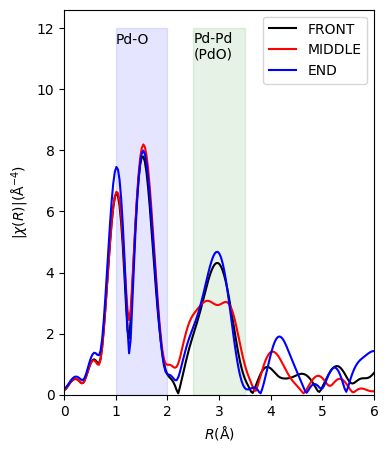

In [4]:
#define dict to set colours and line stiles
plot_groups = {"FRONT":["black", "solid"], "MIDDLE":["r", "solid"], 
               "END":['b', "solid"]}
              
highlights = [[[1, 1, 2, 2],[0, 12, 12, 0], 'b',0.1],[[2.5,2.5, 3.5, 3.5],[0, 12, 12, 0], 'g', 0.1]]        
labels=[[1, 11.5, "Pd-O"],[2.5, 11.0, "Pd-Pd\n(PdO)"]]

plt = plot_chi_magnitude(He_100ca_groups, plot_groups, (4,5),[0,6],[0,12.6], highlights, labels)
plt.show()

### Reproduce figure 3b 

In [5]:
# read the input files 
data_prj = athenamgr.read_project(CO_280c_data)

He_280c_mappings={"FRONT":  "d_280_noH2_30_7_15_3_1_O2_CO_pos1_merge",
                  "END":    "d_280_noH2_30_7_15_3_1_O2_CO_pos11_merge",
                  "MIDDLE": "d_280_noH2_30_7_15_3_1_O2_CO_pos5_merge"}              
                 

He_280c_groups = {}
for a_mapping in He_280c_mappings:
    He_280c_groups[a_mapping] = athenamgr.get_group(data_prj, He_280c_mappings[a_mapping])
    # Pre-edge subtraction and normalization. 
    pre_edge(He_280c_groups[a_mapping])
    # Determine the post-edge background function mu0(E) and corresponding chi(k).
    autobk(He_280c_groups[a_mapping])
    # perform a forward XAFS Fourier transform, from chi(k) to chi(R), using common XAFS conventions.
    xftf(He_280c_groups[a_mapping].k, He_280c_groups[a_mapping].chi, 
     kmin=2.9, kmax=12.5, window='hanning',  
     kweight = 3, rmin=1,rmax=3, dk=1, 
     group=He_280c_groups[a_mapping])
    He_280c_groups[a_mapping].filename = a_mapping

 do not know what to do with key 'LCF' at ''


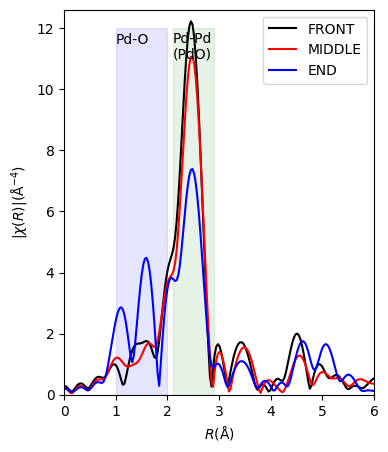

In [6]:
#define dict to set colours and line stiles
plot_groups = {"FRONT":["black", "solid"], "MIDDLE":["r", "solid"], 
               "END":['b', "solid"]}
              
highlights = [[[1, 1, 2, 2],[0, 12, 12, 0], 'b',0.1],[[2.1,2.1, 2.9, 2.9],[0, 12, 12, 0], 'g', 0.1]]        
labels=[[1, 11.5, "Pd-O"],[2.1, 11, "Pd-Pd\n(PdO)"]]

plt = plot_chi_magnitude(He_280c_groups, plot_groups, (4,5),[0,6],[0,12.6], highlights, labels)
plt.show()

### Reproduce figure 3c 

In [7]:
# read the input files 
data_prj = athenamgr.read_project(H2_280c_data)

H2_280c_mappings ={"FRONT":  "d_280_withH2_pos1_3_1_30_7_15merge",
                   "END":    "d_280_withH2_pos11_3_1_30_7_15merge",
                   "MIDDLE": "d_280_withH2_pos5_3_1_30_7_15merge"}              
                 
H2_280c_groups = {}
for a_mapping in H2_280c_mappings:
    H2_280c_groups[a_mapping] = athenamgr.get_group(data_prj, H2_280c_mappings[a_mapping])
    # Pre-edge subtraction and normalization. 
    pre_edge(H2_280c_groups[a_mapping])
    # Determine the post-edge background function mu0(E) and corresponding chi(k).
    autobk(H2_280c_groups[a_mapping])
    # perform a forward XAFS Fourier transform, from chi(k) to chi(R), using common XAFS conventions.
    xftf(H2_280c_groups[a_mapping].k, H2_280c_groups[a_mapping].chi, 
     kmin=2.9, kmax=12.5, window='hanning',  
     kweight = 3, rmin=1,rmax=3, dk=1, 
     group=H2_280c_groups[a_mapping])
    H2_280c_groups[a_mapping].filename = a_mapping

 do not know what to do with key 'LCF' at ''


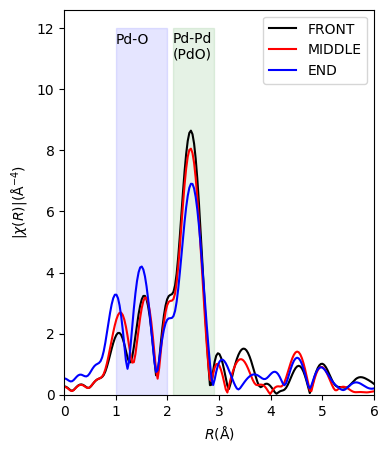

In [8]:
#define dict to set colours and line stiles
plot_groups = {"FRONT":["black", "solid"], "MIDDLE":["r", "solid"], 
               "END":['b', "solid"]}
              
highlights = [[[1, 1, 2, 2],[0, 12, 12, 0], 'b',0.1],[[2.1,2.1, 2.9, 2.9],[0, 12, 12, 0], 'g', 0.1]]        
labels=[[1, 11.5, "Pd-O"],[2.1, 11, "Pd-Pd\n(PdO)"]]

plt = plot_chi_magnitude(H2_280c_groups, plot_groups, (4,5),[0,6],[0,12.6], highlights, labels)
plt.show()

## Reproducibility results

Most of the results can be reproduced. 

**Issues:** to reproduce 2a, need to align using the references in artemis file, need to do it in larch (artemis does it automatically) the function for **FT $\chi(k)$ (&#8491;$^{−4}$)** used here can serve for paper 03

Need to contact authors to ask for comment


In [9]:
from larch.xafs import pre_edge
from larch.xafs import autobk
from larch.xafs import ftwindow
from larch.xafs import xftf
data = He_100ca_groups["END"]
#pre_edge(data)
#autobk(data)
xftf(data.k, data.chi, kweight=3.0, dk=4, group=data)

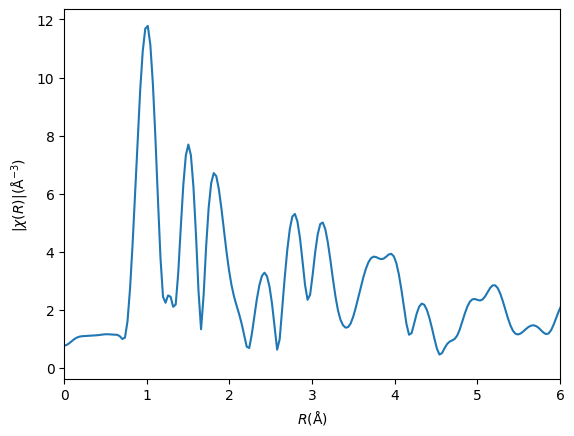

In [10]:
#xftf(data.k, data.chi, kweight=3.0, group=data)
plt.plot(data.r, data.chir_mag)

plt.xlabel("$R(\mathrm{\AA})$")
plt.ylabel("$|\chi(R)|(\mathrm{\AA}^{-3})$")
plt.xlim([0,6])
plt.show()

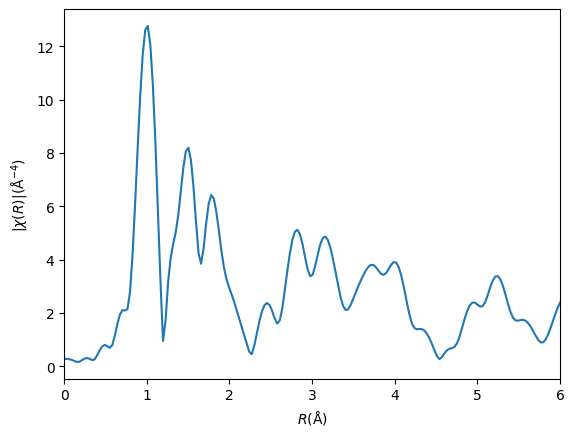

In [11]:
#xftf(dat1.k, dat1.chi, kmin=1, kmax=12.5, dk=1, window='hanning', kweight=0.5, group=dat1)
xftf(data.k, data.chi, kmin=3, kmax=17, dk=4, window='hanning',  kweight = 3, group=data)
plt.plot(data.r, data.chir_mag)

plt.xlabel("$R(\mathrm{\AA})$")
plt.ylabel("$|\chi(R)|(\mathrm{\AA}^{-4})$")
plt.xlim([0,6])
plt.show()

In [12]:
data

Attribute,Type
energy,ndarray
mu,ndarray
athena_params,Group
stddev,ndarray
epsr,float
label,str
epsk,float
sel,int
datatype,str
filename,str


In [13]:
data.athena_params

Attribute,Type
id,str
bkg,Group
fft,Group
bft_rmin,float
merge_weight,float
energy,str
npts,float
plot_scale,float
mark,float
numerator,str


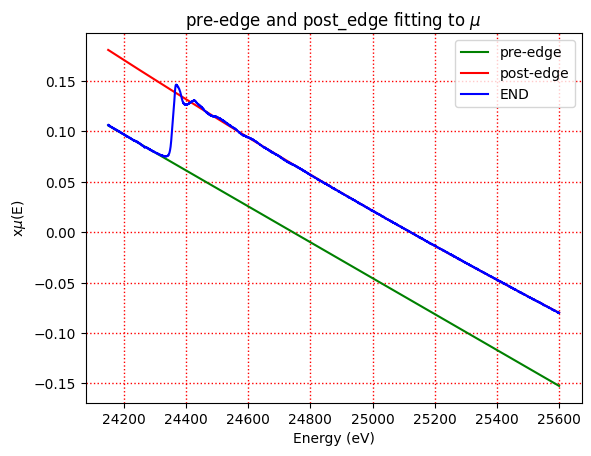

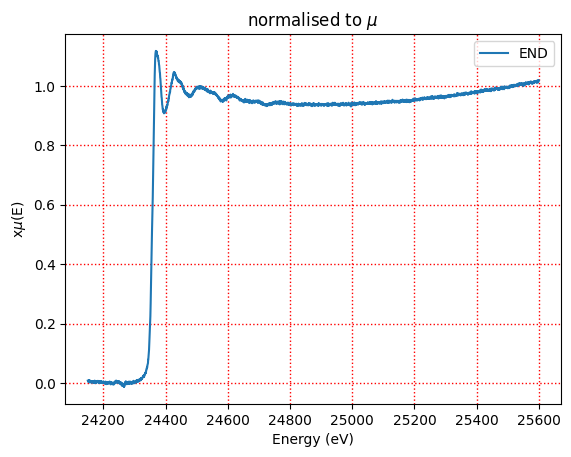

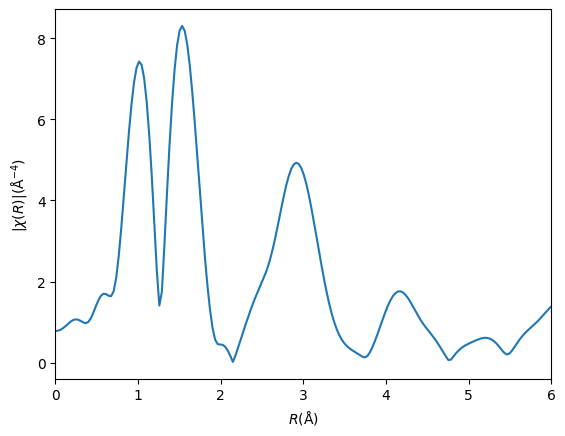

In [14]:
# calculate pre-edge and post edge 
xas_data = He_100ca_groups["END"]
xas_data.e0 = 24353.900
athenamgr.fit_pre_post_edge(xas_data, -150, -60)
#athenamgr.calc_with_defaults(xas_data)
# Show pre and post edge fit
autobk(xas_data)

plt = athenamgr.plot_edge_fit(xas_data)
plt.show()

# show normalised mu
plt = athenamgr.plot_normalised(xas_data)
plt.show()


xftf(xas_data.k, xas_data.chi, 
     kmin=2.9, kmax=12.5, window='hanning',  
     kweight = 3, rmin=1,rmax=3, dr=0,dk=1, 
     group=xas_data)

plt.plot(xas_data.r, xas_data.chir_mag)

plt.xlabel("$R(\mathrm{\AA})$")
plt.ylabel("$|\chi(R)|(\mathrm{\AA}^{-4})$")
plt.xlim([0,6])
plt.show()

In [15]:
He_100ca_groups

{'FRONT': <Group 0x28c221adc40>,
 'END': <Group 0x28c221adbb0>,
 'MIDDLE': <Group 0x28c221ad790>}

In [16]:
xas_data 

Attribute,Type
energy,ndarray
mu,ndarray
athena_params,Group
stddev,ndarray
epsr,float
label,str
epsk,float
sel,int
datatype,str
filename,str


In [17]:
xas_data.e0 = 24353.900

In [18]:
xas_data.athena_params

Attribute,Type
id,str
bkg,Group
fft,Group
bft_rmin,float
merge_weight,float
energy,str
npts,float
plot_scale,float
mark,float
numerator,str


In [19]:
xas_data = data_prj._athena_groups['Pd_bkg_100c_He_pos11_END_merge']

KeyError: 'Pd_bkg_100c_He_pos11_END_merge'

In [ ]:
xas_data
xas_data.filename = "x"
xas_data.e0 = 24353.900
athenamgr.fit_pre_post_edge(xas_data, -150, -60)

autobk(xas_data)
plt = athenamgr.plot_edge_fit(xas_data)
plt.show()

# show normalised mu
plt = athenamgr.plot_normalised(xas_data)
plt.show()


In [ ]:
autobk(xas_data.energy, xas_data.mu, rbkg=1.0, group=xas_data)

xftf(xas_data.k, xas_data.chi, 
     kmin=3.9, kmax=12.5, window='welch',  
     kweight = 3, dk=1, 
     group=xas_data)

plt.plot(xas_data.r, xas_data.chir_mag)

plt.xlabel("$R(\mathrm{\AA})$")
plt.ylabel("$|\chi(R)|(\mathrm{\AA}^{-4})$")
plt.xlim([0,6])
plt.show()

In [ ]:
from larch.xafs.pre_edge import  energy_align


xas_data = He_100ca_groups["END"]
reference_spectrum = athenamgr.get_group(data_prj, 'd__Ref_Pd_bkg_100c_He_pos11_END_merge')


xas_data, reference_spectrum =  nergy_align(xas_data, reference_spectrum)